<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

---

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-data" data-toc-modified-id="Import-the-data-1">Import the data</a></span></li><li><span><a href="#Do-some-EDA-of-relationships-between-features" data-toc-modified-id="Do-some-EDA-of-relationships-between-features-2">Do some EDA of relationships between features</a></span></li><li><span><a href="#Prepare-the-data-for-clustering" data-toc-modified-id="Prepare-the-data-for-clustering-3">Prepare the data for clustering</a></span></li><li><span><a href="#Rescale-the-data-if-necessary" data-toc-modified-id="Rescale-the-data-if-necessary-4">Rescale the data if necessary</a></span></li><li><span><a href="#Clustering-with-K-Means" data-toc-modified-id="Clustering-with-K-Means-5">Clustering with K-Means</a></span></li><li><span><a href="#Get-the-labels-and-centroids-for-out-first-clustering-model" data-toc-modified-id="Get-the-labels-and-centroids-for-out-first-clustering-model-6">Get the labels and centroids for out first clustering model</a></span></li><li><span><a href="#Compute-the-silhouette-score-and-visually-examine-the-results-of-the-clusters" data-toc-modified-id="Compute-the-silhouette-score-and-visually-examine-the-results-of-the-clusters-7">Compute the silhouette score and visually examine the results of the clusters</a></span></li><li><span><a href="#Repeat-steps-#4-and-#6-with-two-selected-or-random-K-values-and-compare-the-results-to-the-k=8-model" data-toc-modified-id="Repeat-steps-#4-and-#6-with-two-selected-or-random-K-values-and-compare-the-results-to-the-k=8-model-8">Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model</a></span></li><li><span><a href="#Build-a-function-to-find-the-optimal-number-of-clusters-using-silhouette-score-as-the-criterion." data-toc-modified-id="Build-a-function-to-find-the-optimal-number-of-clusters-using-silhouette-score-as-the-criterion.-9">Build a function to find the optimal number of clusters using silhouette score as the criterion.</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Import the data

In [3]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [4]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Do some EDA of relationships between features

In [5]:
seeds.shape

(210, 8)

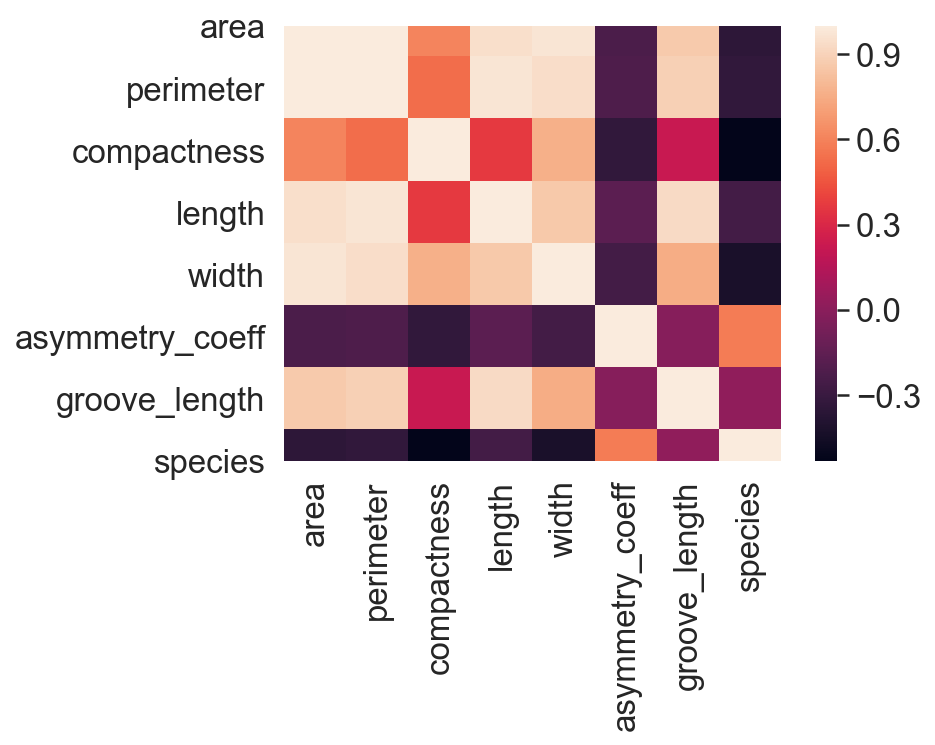

In [10]:
cor = seeds.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map


In [11]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1



### Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [12]:
# drop 'species', which is currently acting as a target (categorical)
y = seeds.pop("species")

In [13]:
X = seeds

### Rescale the data if necessary

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xstd = scaler.fit_transform(X)

### Clustering with K-Means

- We know that there are 3 actual classes. 
- Use the elbow plot to judge if 3 clusters are a good fit.

In [16]:
from sklearn.cluster import KMeans


In [17]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(Xstd)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [18]:
from scikitplot.cluster import plot_elbow_curve


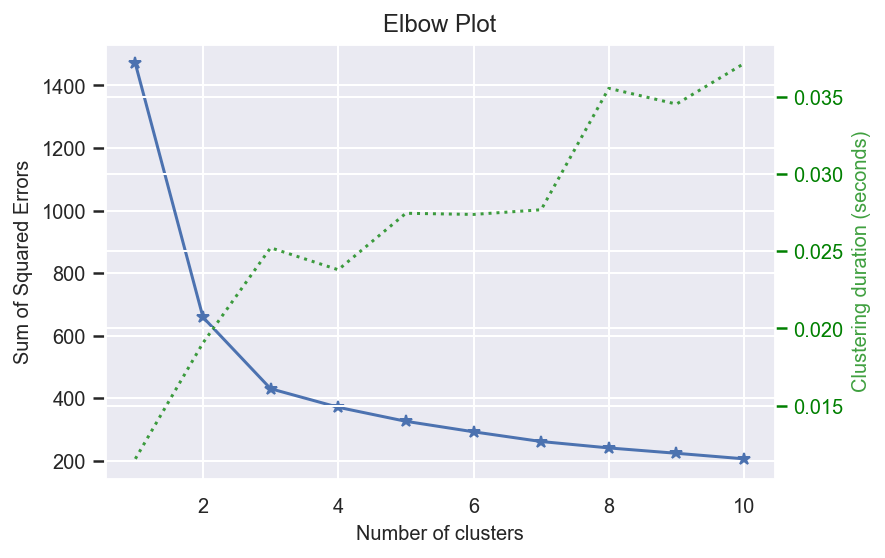

In [19]:
plot_elbow_curve(model, Xstd, cluster_ranges=range(1, 11))
plt.show()


### Get the labels and centroids for out first clustering model

In [20]:
labels = model.labels_
centroids = model.cluster_centers_
print(labels)
print(centroids)

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0]
[[-1.03025257 -1.00664879 -0.9649051  -0.89768501 -1.08558344  0.69480448
  -0.62480856]
 [ 1.25668163  1.26196622  0.56046437  1.23788278  1.16485187 -0.04521936
   1.29230787]
 [-0.14111949 -0.17004259  0.4496064  -0.25781445  0.00164694 -0.66191867
  -0.58589311]]


### Compute the silhouette score and visually examine the results of the clusters

_(pairplot with hue)_

In [22]:
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
silhouette_score(X, labels)


0.4506120960157481

In [26]:
from matplotlib.colors import ListedColormap
from scikitplot.metrics import plot_silhouette

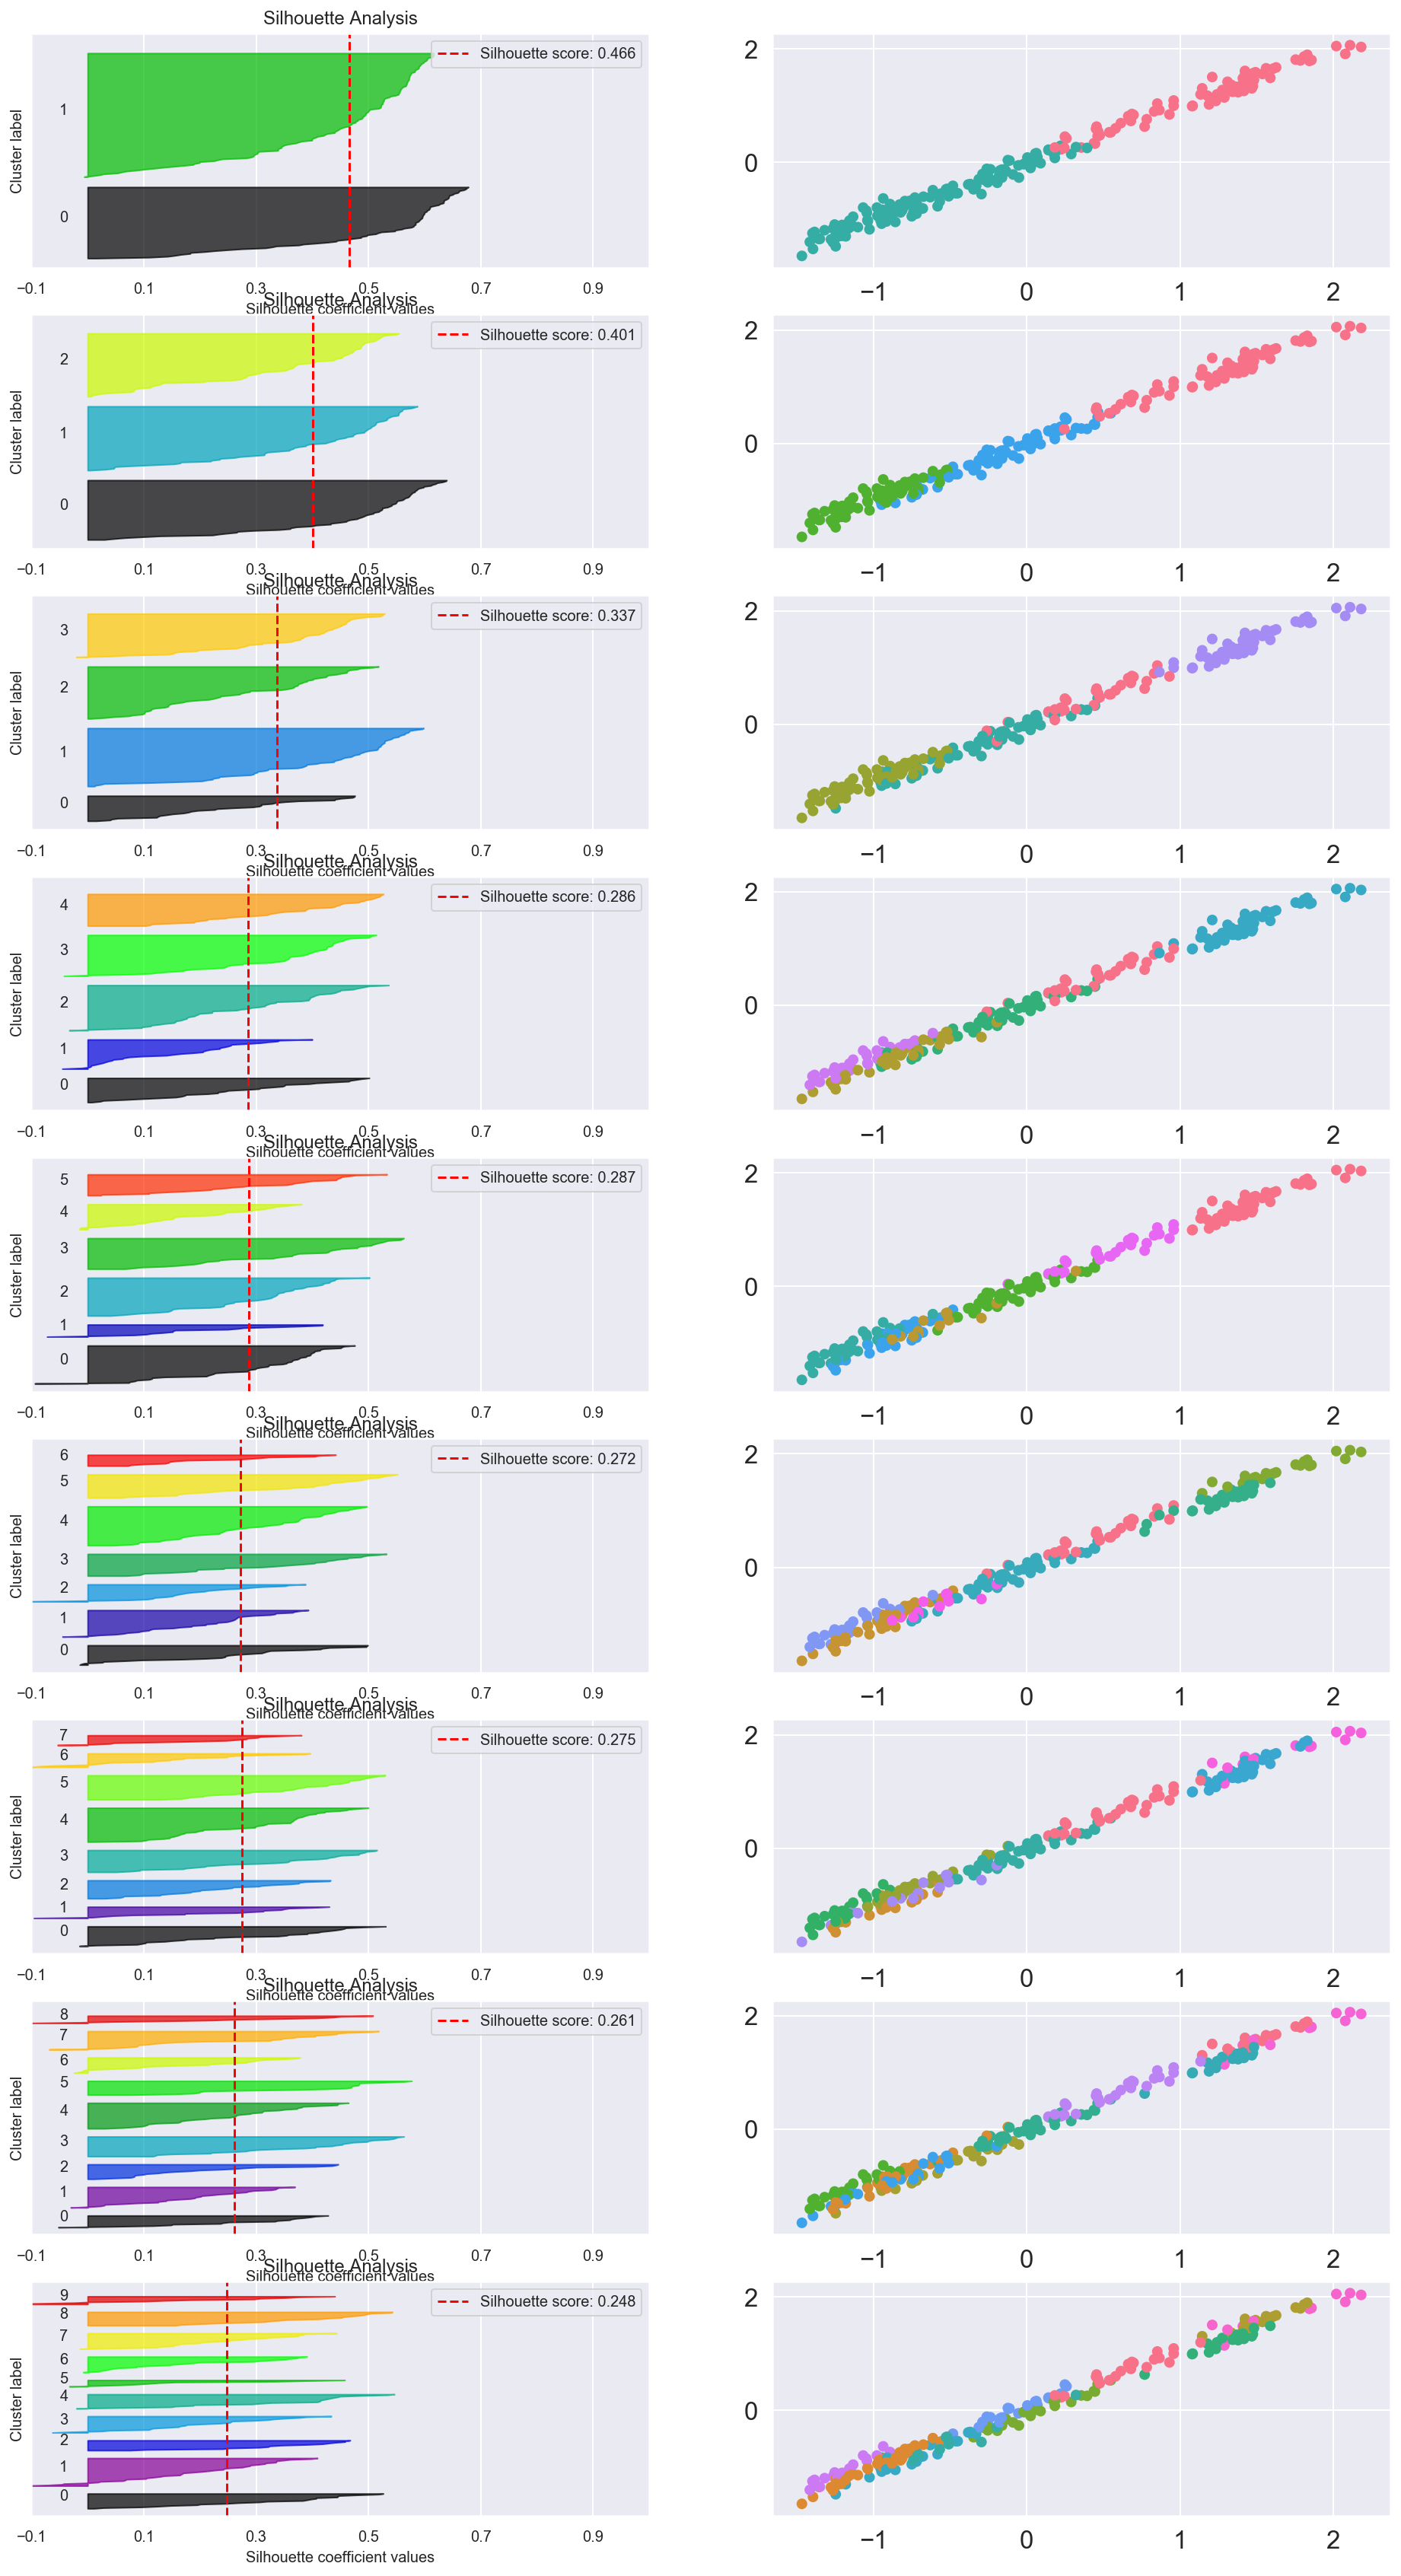

In [27]:
silhouette = []

fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(16, 30))

for k in range(2, 11):
    
    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit_predict(Xstd)
    silhouette.append((k, silhouette_score(Xstd, labels)))
    
    cmap = ListedColormap(sns.color_palette("husl", n_colors=k))
    plot_silhouette(Xstd, labels, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(Xstd[:,0], Xstd[:,1], color=cmap(labels))

silhouette = np.array(silhouette)

### Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model

In [28]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [30]:
labels = model.labels_
print(labels)

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0]


In [33]:
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score

silhouette_score(X, labels)

0.4506120960157481

In [34]:
model = KMeans(n_clusters=8, random_state=0)
model.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [35]:
labels = model.labels_
print(labels)

[6 6 3 3 3 3 6 3 5 5 5 6 3 6 6 3 3 3 3 1 6 6 3 1 6 6 1 1 6 1 6 6 6 6 6 3 5
 5 6 7 3 6 3 5 3 6 6 3 6 6 6 5 6 6 6 6 3 3 6 1 1 1 1 1 1 3 6 6 6 1 5 5 5 4
 5 5 5 0 0 5 5 0 0 4 4 4 4 0 0 0 4 4 4 0 0 5 0 4 4 4 5 4 0 0 4 4 4 5 0 4 4
 0 4 0 0 4 4 4 4 0 0 4 5 4 3 4 0 4 4 5 4 4 5 5 5 3 5 5 5 5 7 7 7 7 2 2 1 1
 1 2 7 2 2 2 2 2 1 2 2 2 1 1 2 1 7 1 7 1 2 2 2 7 2 2 2 7 2 2 7 1 7 7 7 7 7
 2 2 2 7 7 2 1 1 2 1 7 7 7 1 3 7 3 1 7 1 1 1 7 1 7]


In [36]:
silhouette_score(X, labels)

0.18269266395803546

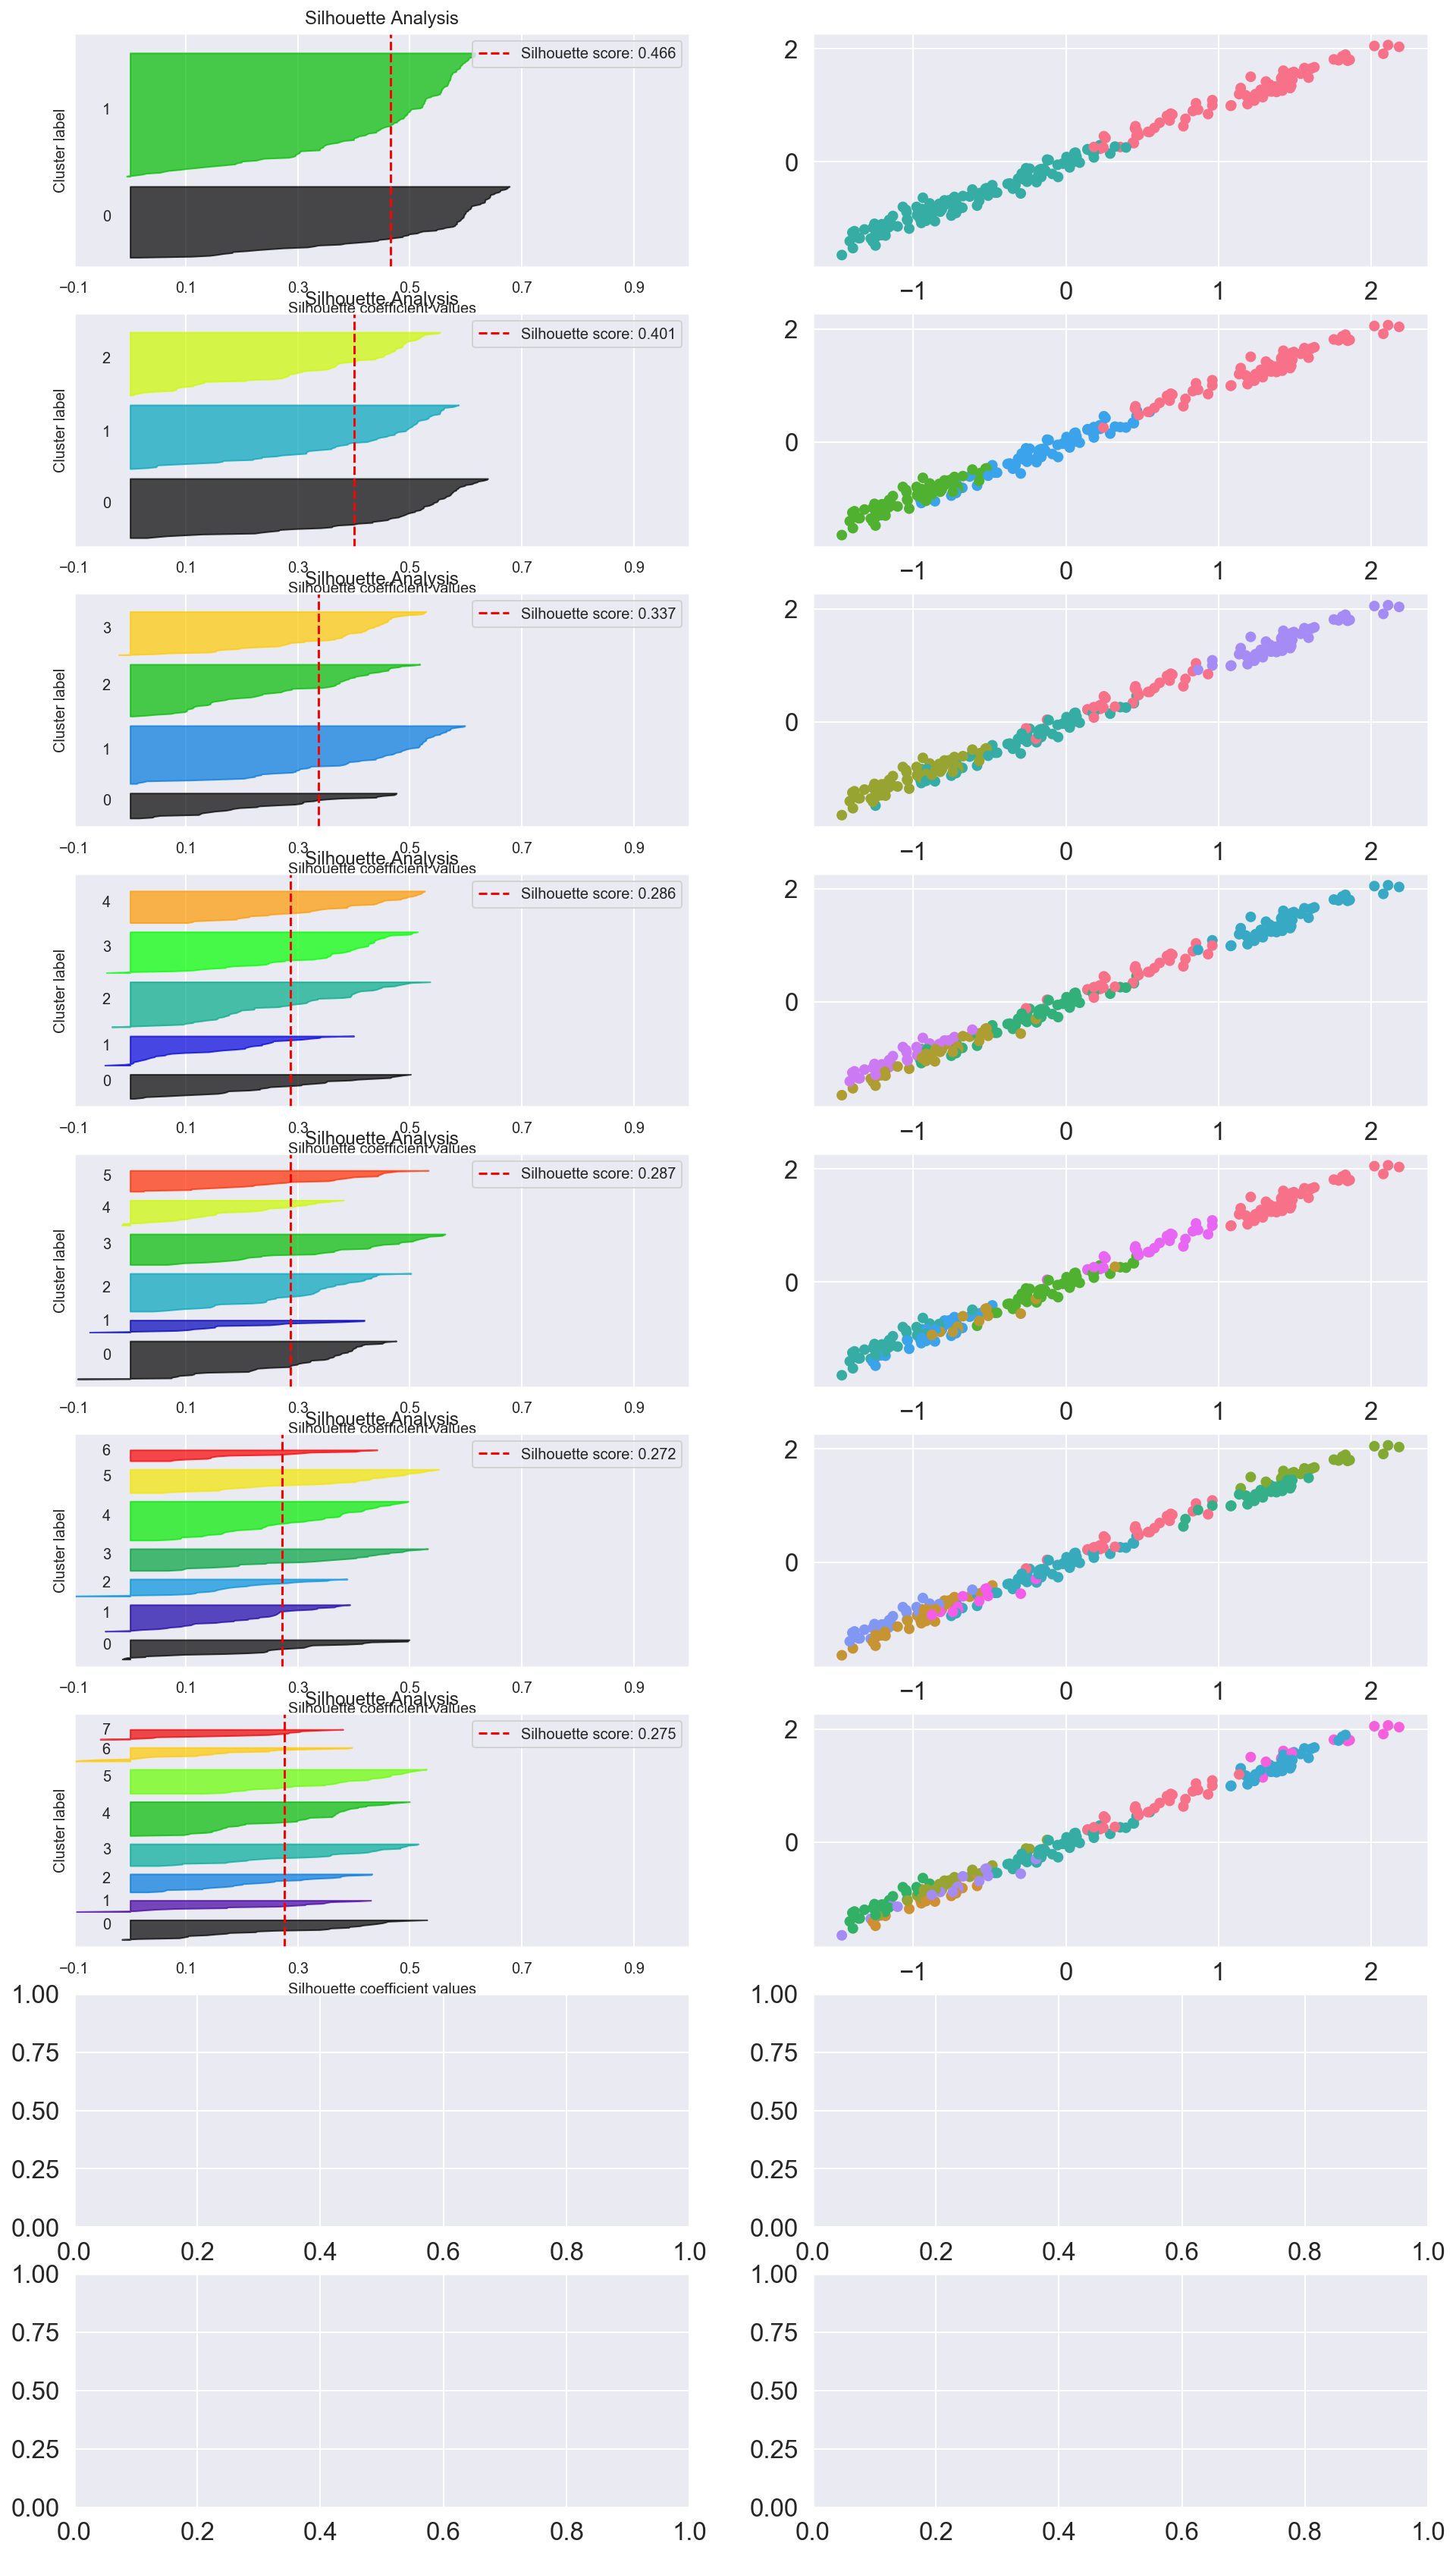

In [38]:
silhouette = []
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(16, 30))
for k in range(2, 9):
    
    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit_predict(Xstd)
    silhouette.append((k, silhouette_score(Xstd, labels)))
    
    cmap = ListedColormap(sns.color_palette("husl", n_colors=k))
    plot_silhouette(Xstd, labels, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(Xstd[:,0], Xstd[:,1], color=cmap(labels))
silhouette = np.array(silhouette)


### Build a function to find the optimal number of clusters using silhouette score as the criterion.
1. The function should accept a range and a dataframe as arguments
2. It should return the k value, associated silhoutte score and scaling method.
3. Your function should also consider different scaling options like `StandardScaler`, `MinMaxScaler`.